### Data Description
There were 1535 observations of five variables in sessions.csv: 
- hashedEmail: chr
    - Serves as a player identifier between both datasets
    - The email with the most sessions played had a total of 310 sessions
- start_time: chr
    - String start time
- end_time: chr
    - String end time
- original_start_time: dbl
    - Number start time
- original_end_time: dbl
    - Number end time
    - The longest single session was four hours long

There were 196 observations of seven variables in players.csv: 
- experience: chr
    - Experience level of player
    - 63 players were Amateurs, 48 were Veterans, 36 were Regular, 35 were Beginners, and 14 were pros
- subscribe: lgl
    - Whether or not a player subscribed
    - Most players subscribed with 144 subscribing, and 52 not subscribing
- hashedEmail: chr
    - Unique identifier to track sessions
- played_hours: dbl
    - Total hours played by each player
    - Most hours played was 223.1 while the least was 0
- name: chr
    - Name of the player
- gender: chr
    - Players gender
    - 124 Males, 37 Females, 15 Non-Binary, 11 Prefer not to say, 6 Two-Spirited, 2 Agender, and 1 Other
- age: dbl
    - Players age
    - The oldest player was 58 and the youngest was 9

- This is likley raw data collected from the database.

### Question
Can played_hours and Age predict experience in players.csv?
The data is already formatted in such a way that each player has an experience level, an amount of hours played, and an age. This will reduce the amount of wrangling to just removing the rows with NA values.

### Exploratory Data Analysis and Visualization

In [111]:
# Loading libraries and datasets into R
library("tidyverse")
players = read_csv("data/players.csv")
sessions = read_csv("data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [112]:
# Minimum necessary wrangling: removing rows with NA age
players = players[!is.na(players$Age),]

In [113]:
# Mean value for each quantitative variable in players.csv
mean_vals_table = players|>
    select(played_hours, Age)|>
    map_df(mean)
mean_vals_table

played_hours,Age
<dbl>,<dbl>
5.904639,21.13918


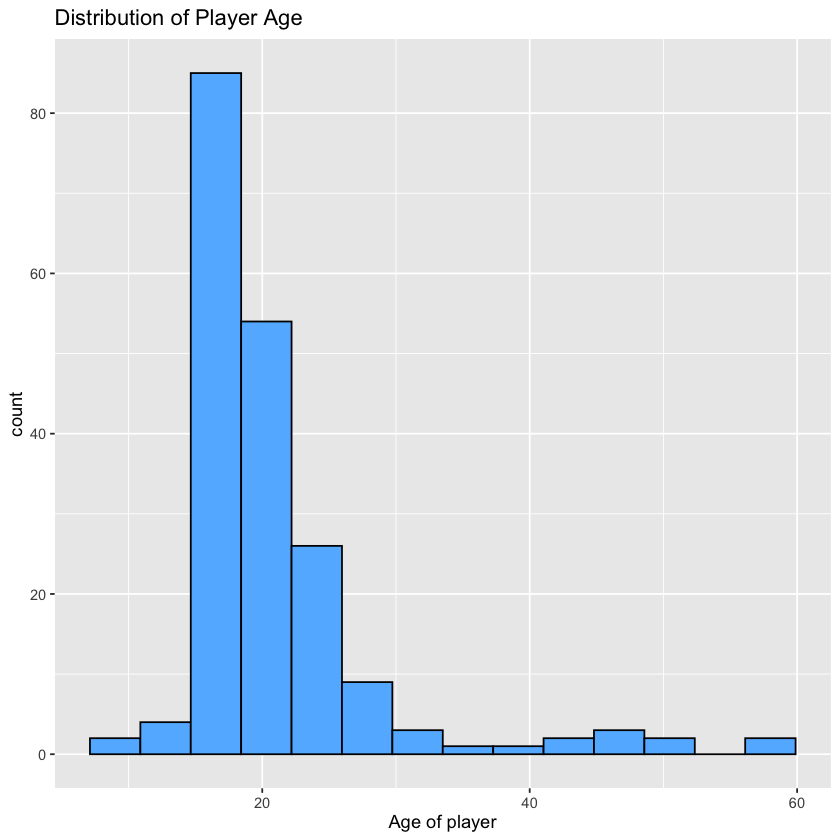

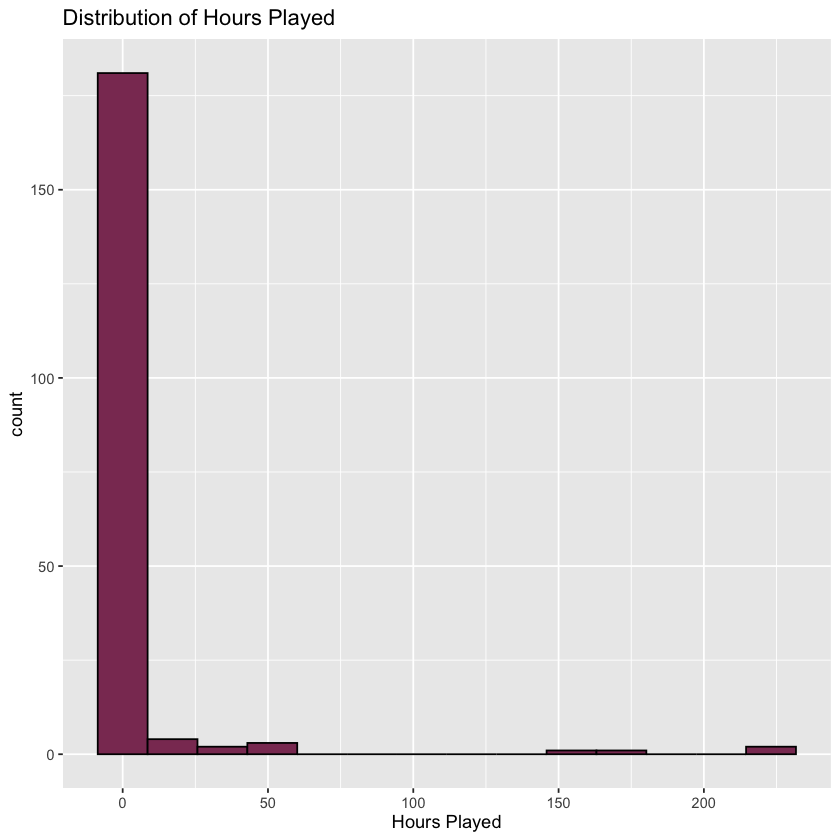

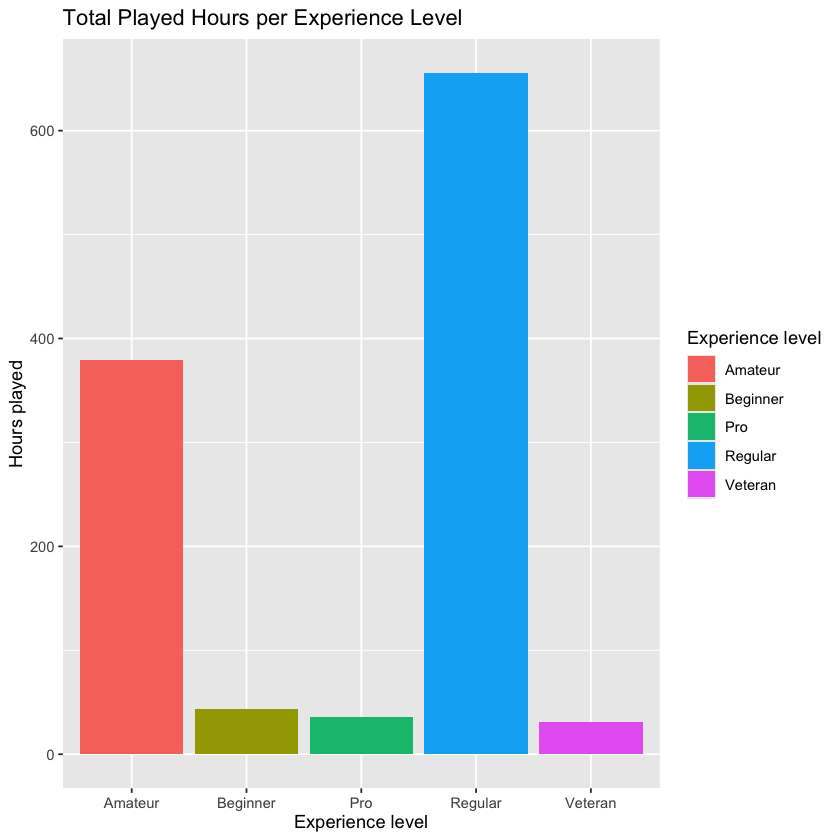

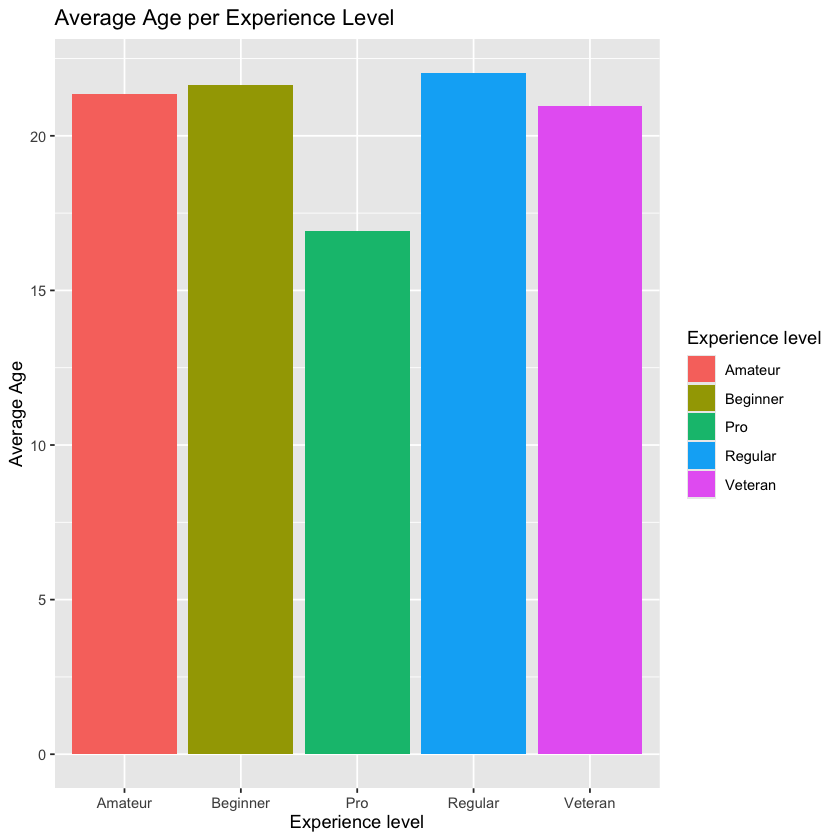

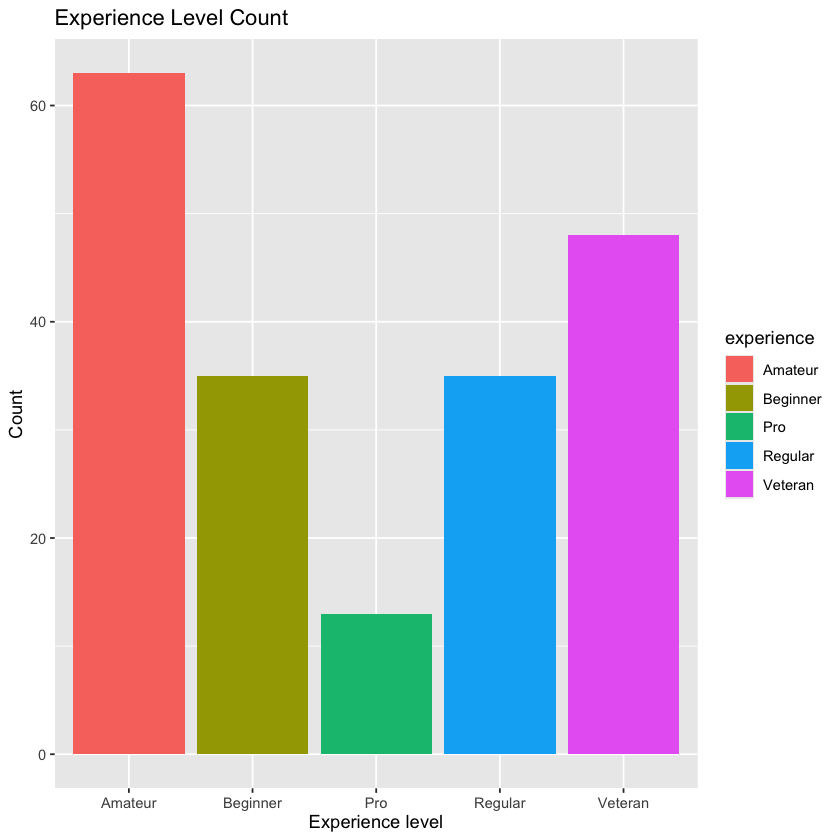

In [114]:
# Explanatory visualizations
NUMBINS = round(sqrt(nrow(players)))

age_hist = players|>
    ggplot(aes(x = Age))+
        geom_histogram(fill="steelblue1", col = "black",bins = NUMBINS)+
        labs(title = "Distribution of Player Age", x = "Age of player")

hours_hist = players|>
    ggplot(aes(x = played_hours))+
        geom_histogram(fill="hotpink4", col = "black",bins = NUMBINS)+
        labs(title = "Distribution of Hours Played", x = "Hours Played")

experience_hours = players|>
    group_by(experience)|>
    summarise(hours=sum(played_hours))|>
    ggplot(aes(x = experience, y = hours, fill = experience))+
        geom_bar(stat = "identity")+
        labs(title = "Total Played Hours per Experience Level", x = "Experience level", y = "Hours played", fill = "Experience level")

experience_age = players|>
    group_by(experience)|>
    summarise(Age=mean(Age))|>
    ggplot(aes(x = experience, y = Age, fill = experience))+
        geom_bar(stat = "identity")+
        labs(title = "Average Age per Experience Level", x = "Experience level", y = "Average Age", fill = "Experience level")

players_experience = players|>
    ggplot(aes(x=experience, fill=experience))+
        geom_bar()+
        labs(title = "Experience Level Count", x = "Experience level", y = "Count")

age_hist
hours_hist
experience_hours
experience_age
players_experience


- The distribution of player ages tells me that the majority of players are 15-20.
- The distribution of hours played shows that the majority of players did not play the game very much at all
- Players with the "Regular" experience level played more
- The average age for each experience group falls around 20 with the exception of Pros which are around 16-17
- Experience levels aren't evenly occuring

### Methods and Plan
I would use a K-Nearest-Neighbor model
- This is the most appropriate method of prediction as we are taking two **quantitative** predictors (Age, and played_hours), and predicting a **qualitative** (experience) classification
- We need to assume that the data has been standardized and centered, as well as that points with the same experience level will have similar ages and played hours
- We have an uneven distribution of experience so id have to accomodate that.
- I will use an initial split to split the data into training and testing sets. I will then make use of cross validation in order to find the best K value for my KNN model. This allows me to find the most accurate K as well as having a portion of data to test at the end to get my models statistics such as precision, recall, and accuracy.
- Given the size of the dataset I would use 75% of the data for training and the remaining 25% for testing. I would also use five folds on the training set to pick the best K value. 

### GitHub Link
https://github.com/JackMartinez6987/DSCI100-Group27